In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before dev and training sets

#split data to training and development sets
data_dev = data[0:1000].T #transpose first 1000
Y_dev = data_dev[0] 
X_dev = data_dev[1:n] #features rest rows
X_dev = X_dev / 255. #normalize

data_train = data[1000:m].T #remaining
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape #number of training examples



In [5]:
Y_train

array([8, 5, 3, ..., 4, 7, 3], dtype=int64)

In [ ]:
'''def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2'''
def init_params():
    np.random.seed(1)
    W1 = np.random.randn(10, 784) * 0.01 #scaled by 0.01
    b1 = np.zeros((10, 1)) #bias vector with 0s
    W2 = np.random.randn(10, 10) * 0.01
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2
def ReLU(Z):
    return np.maximum(Z, 0)


def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


def ReLU_deriv(Z):
    return Z > 0 #1 if Z>0 and 0 if Z<=0


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1 # 1 for position of Y
    one_hot_Y = one_hot_Y.T #transpose so col shows val of sample
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [7]:

def get_predictions(A2):
    return np.argmax(A2, 0)

#compare predictions with actual labels Y and calculate accuracy
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations,  order=0.9):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
       
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

        

In [8]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, alpha=0.1, iterations=500, order=0.9)


Iteration:  0
[5 9 5 ... 5 8 5] [8 5 3 ... 4 7 3]
0.09104878048780488
Iteration:  10
[5 3 5 ... 2 8 8] [8 5 3 ... 4 7 3]
0.13485365853658537
Iteration:  20
[8 3 2 ... 2 8 8] [8 5 3 ... 4 7 3]
0.18646341463414634
Iteration:  30
[8 3 2 ... 2 8 8] [8 5 3 ... 4 7 3]
0.22397560975609757
Iteration:  40
[8 3 2 ... 2 0 8] [8 5 3 ... 4 7 3]
0.2476829268292683
Iteration:  50
[8 3 2 ... 2 0 2] [8 5 3 ... 4 7 3]
0.23682926829268292
Iteration:  60
[0 3 0 ... 0 0 2] [8 5 3 ... 4 7 3]
0.17797560975609755
Iteration:  70
[0 0 0 ... 0 0 3] [8 5 3 ... 4 7 3]
0.1523170731707317
Iteration:  80
[0 0 0 ... 0 0 3] [8 5 3 ... 4 7 3]
0.17273170731707316
Iteration:  90
[3 3 3 ... 0 0 3] [8 5 3 ... 4 7 3]
0.251609756097561
Iteration:  100
[3 3 3 ... 2 7 3] [8 5 3 ... 4 7 3]
0.3575121951219512
Iteration:  110
[3 3 3 ... 4 7 3] [8 5 3 ... 4 7 3]
0.43485365853658536
Iteration:  120
[3 3 3 ... 4 7 9] [8 5 3 ... 4 7 3]
0.5945609756097561
Iteration:  130
[8 1 3 ... 4 7 9] [8 5 3 ... 4 7 3]
0.6593414634146342
Iteration:

In [ ]:
#Use the trained network to predict labels for new input data.
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255 #rescale 
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


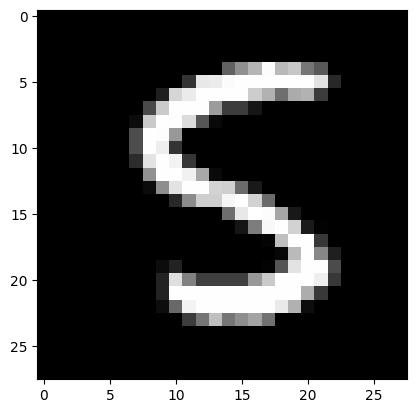

In [10]:
test_prediction(5,W1,b1,W2,b2)

Prediction:  [3]
Label:  3


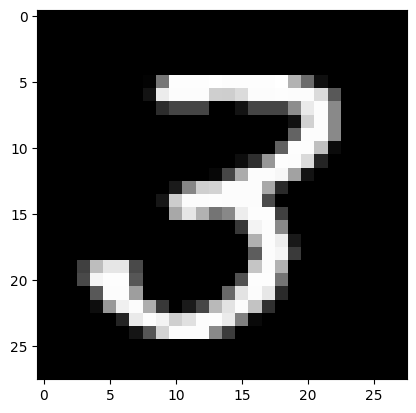

In [11]:
test_prediction(65,W1,b1,W2,b2)

In [12]:
#check with cross validation accuracy
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 2 9 5 0 2 5 4 0 6 5 1 0 1 3 0 4 5 1 0 9 6 7 9 3 2 4 4 8 7 3 2 7 7 1 8 0
 0 6 4 7 5 1 1 5 6 4 3 7 5 2 7 7 5 4 1 8 9 6 1 5 1 1 1 0 5 4 9 5 3 1 9 2 0
 3 5 3 1 8 0 6 7 7 6 5 0 1 0 1 1 1 5 4 8 4 9 6 8 7 2 1 3 9 1 9 6 4 0 2 7 0
 6 0 6 1 0 2 8 0 9 6 0 8 8 8 9 0 3 9 7 0 4 2 1 6 3 4 6 7 0 3 8 0 8 9 4 0 1
 4 6 3 4 8 3 2 4 4 7 8 2 3 4 8 9 2 1 7 0 7 9 8 9 0 7 4 4 4 1 0 6 5 4 1 2 9
 0 7 6 3 6 5 0 0 5 8 6 4 2 6 3 2 0 0 7 9 2 2 9 1 2 5 8 4 2 5 3 9 6 5 0 6 3
 9 3 3 5 0 0 9 9 4 5 0 3 2 1 7 1 2 2 4 7 1 4 6 5 5 6 5 3 6 8 2 1 9 7 8 6 7
 4 3 6 3 0 0 0 4 9 9 2 1 1 3 4 9 4 9 9 1 4 1 0 2 2 4 7 9 5 4 5 2 3 9 2 9 2
 1 9 5 4 8 2 5 9 7 4 9 4 9 6 7 6 2 4 5 7 7 0 3 8 7 3 2 5 4 6 6 8 3 0 4 6 3
 1 4 7 0 9 1 2 2 0 7 1 5 7 7 9 0 6 5 9 8 1 9 6 1 7 5 5 3 6 4 1 7 3 8 7 5 7
 9 2 9 1 7 8 6 9 1 4 1 5 8 4 6 1 4 5 0 7 2 7 8 2 0 2 4 3 8 9 2 6 9 2 7 4 1
 4 0 2 8 0 1 9 0 3 1 7 7 4 0 6 8 1 2 0 8 2 0 8 9 8 8 8 7 2 0 9 3 1 1 9 2 8
 3 1 4 4 9 8 2 4 2 3 8 6 8 6 4 5 6 1 5 0 0 6 0 7 2 7 3 4 7 2 1 6 8 9 3 2 2
 1 7 9 9 9 0 0 8 0 6 9 5 

0.894